<a href="https://colab.research.google.com/github/ab4821/Air-Pollution-and-Mental-Health-/blob/main/PollutionAndMentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # prevents future version warnings
import matplotlib.pyplot as plt
import sklearn.linear_model
from scipy import stats
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.linear_model import LinearRegression as lr
from scipy.stats import t as tdist

from google.colab import files
files.upload()

Saving pollution_data.csv to pollution_data.csv


{'pollution_data.csv': b'Age,Gender,District,Education,Occurrence_mental,Wellbeing,Energy,Stress,sleep,Outdoor_time,Computer_time,Diet,Alcohol,Drugs,Smoker,Illness,Stroop_performance,NO2_24h,PM2.5_24h,\xb5gm3_24h,BC_24h,Noise_bin,GreenSpace_bin,AvgTemp_24h,Humidity_24h,Pressure_24h,Precipitation_bin,Wind_24h,covid_work,covid_mood,covid_sleep,covid_spaces,covid_air,covid_motor,covid_electric,covid_bikewalk,covid_public_trans,,,,,,,,,,,,,,,,,,,\r\n28,0,Eixample,2,10,9,5,8,9,8,0,1,1,0,1,1,56.00606732,44.51190476,13.38333333,28.48,1.5075053,1,1,17.7,69.60416667,1020.725,0,0,0,2,2,0,0,2,0,0,1,,,,,,,,,Legend,Gender,Education level,"computer, diet, alcohol, \ndrugs, smoker, illness, \naccess to green/blue",covid work/sleep/mood,covid spaces/air,"covid motor/bikewalk/\npublictrans/electric",,,,\r\n29,0,Sant Mart\xc3\xad,2,14,3,2,5,2,5,1,1,0,0,0,0,58.177117,33.8125,16.53333333,15.72,1.1670614,1,1,18.05416667,82.97916667,1020.179167,0,0,0,1,1,0,0,2,2,2,1,,,,,,,,,0,Female,Primary or less,no,It ha

In [ ]:
pollution_data = pd.read_csv('pollution_data.csv', encoding = 'unicode_escape', usecols = range(0,37))

In [ ]:
pollution_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1830 non-null   int64  
 1   Gender              1830 non-null   int64  
 2   District            1830 non-null   object 
 3   Education           1830 non-null   int64  
 4   Occurrence_mental   1830 non-null   int64  
 5   Wellbeing           1830 non-null   int64  
 6   Energy              1830 non-null   int64  
 7   Stress              1830 non-null   int64  
 8   sleep               1830 non-null   int64  
 9   Outdoor_time        1830 non-null   float64
 10  Computer_time       1830 non-null   int64  
 11  Diet                1830 non-null   int64  
 12  Alcohol             1830 non-null   int64  
 13  Drugs               1830 non-null   int64  
 14  Smoker              1830 non-null   int64  
 15  Illness             1830 non-null   int64  
 16  Stroop

In [ ]:
pollution_data.head()


,Age,Gender,District,Education,Occurrence_mental,Wellbeing,Energy,Stress,sleep,Outdoor_time,...,Wind_24h,covid_work,covid_mood,covid_sleep,covid_spaces,covid_air,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,28,0,Eixample,2,10,9,5,8,9,8.0,...,0.0,0,2,2,0,0,2,0,0,1
1,29,0,Sant MartÃ­,2,14,3,2,5,2,5.0,...,0.0,0,1,1,0,0,2,2,2,1
2,36,0,GrÃ cia,2,4,6,6,1,4,3.5,...,4.0,0,0,1,0,2,2,2,2,1
3,28,0,Ciutat Vella,2,4,9,9,1,9,5.0,...,4.0,0,0,1,2,2,1,1,0,1
4,50,1,Eixample,2,1,6,6,7,9,11.0,...,0.0,0,2,2,0,0,1,2,0,2


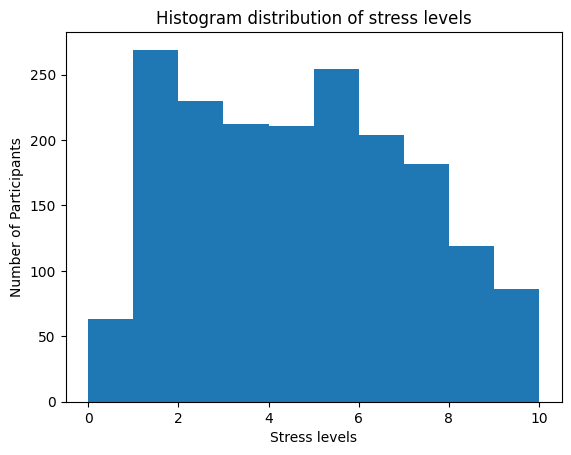

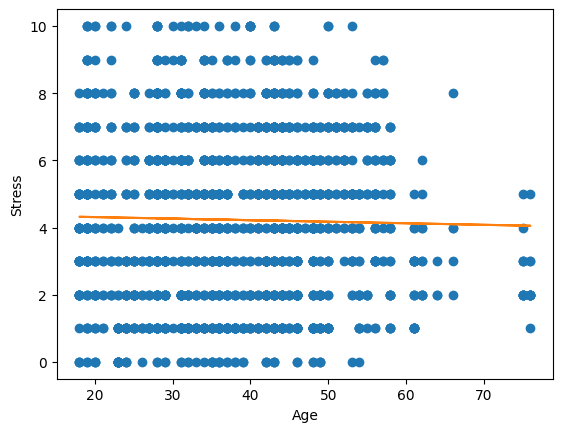

NameError: ignored

In [ ]:
# Plotting histogram distribution to test for normal distribution

plt.hist(pollution_data['Stress'], bins=10)
plt.xlabel('Stress levels')
plt.ylabel('Number of Participants')
plt.title('Histogram distribution of stress levels')
plt.show()

In [ ]:
pollution_data['Stress'].describe()

count    1830.000000
mean        4.227869
std         2.518600
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Stress, dtype: float64

In [ ]:
# Binarise data

pollution_data['stress_binarised'] = pollution_data['Stress'] < 4.227
pollution_data['stress_binarised'] = pollution_data['stress_binarised'].astype(int)

pollution_data['stress_binarised'].describe()

x = 0
y = 0
for i in pollution_data['stress_binarised']:
  if i == 0:
    x = x+1
  elif i == 1:
    y = y + 1

print (x, y)

845 985


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

class ModelSummary:
    """ This class extracts a summary of the model

    Methods
    -------
    get_se()
        computes standard error
    get_ci(SE_est)
        computes confidence intervals
    get_pvals()
        computes p-values
    get_summary(name=None)
        prints the summary of the model
    """

    def __init__(self, clf, X, y):
        """
        Parameters
        ----------
        clf: class
            the classifier object model
        X: pandas Dataframe
            matrix of predictors
        y: numpy array
            matrix of variable
        """
        self.clf = clf
        self.X = X
        self.y = y
        pass

    def get_se(self):
        # from here https://stats.stackexchange.com/questions/89484/how-to-compute-the-standard-errors-of-a-logistic-regressions-coefficients
        predProbs = self.clf.predict_proba(self.X)
        X_design = np.hstack([np.ones((self.X.shape[0], 1)), self.X])
        V = np.diagflat(np.product(predProbs, axis=1))
        covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
        return np.sqrt(np.diag(covLogit))

    def get_ci(self, SE_est):
        """
        Parameters
        ----------
        SE_est: numpy array
            matrix of standard error estimations
        """
        p = 0.975
        df = len(self.X) - 2
        crit_t_value = stats.t.ppf(p, df)
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        upper = coefs + (crit_t_value * SE_est)
        lower = coefs - (crit_t_value * SE_est)
        cis = np.zeros((len(coefs), 2))
        cis[:,0] = lower
        cis[:,1] = upper
        return cis

    def get_pvals(self):
        # from here https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
        p = self.clf.predict_proba(self.X)
        n = len(p)
        m = len(self.clf.coef_[0]) + 1
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        se = self.get_se()
        t =  coefs/se
        p = (1 - stats.norm.cdf(abs(t))) * 2
        return p

    def get_summary(self, names=None):
        ses = self.get_se()
        cis = self.get_ci(ses)
        lower = cis[:, 0]
        upper = cis[:, 1]
        pvals = self.get_pvals()
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        data = []
        for i in range(len(coefs)):
            currlist = []
            currlist.append(np.round(coefs[i], 3))
            currlist.append(np.round(ses[i], 3))
            currlist.append(np.round(pvals[i], 3))
            currlist.append(np.round(lower[i], 3))
            currlist.append(np.round(upper[i], 3))
            data.append(currlist)
        cols = ['coefficient', 'std', 'p-value', '[0.025', '0.975]']
        sumdf = pd.DataFrame(columns=cols, data=data)
        if names is not None:
            new_names = ['intercept']*(len(names) + 1)
            new_names[1:] = [i for i in names]
            sumdf.index = new_names
        else:
            try:
                names = list(self.X.columns)
                new_names = ['intercept']*(len(names) + 1)
                new_names[1:] = [i for i in names]
                sumdf.index = new_names
            except:
                pass
        print(sumdf)
        acc = accuracy_score(self.y, self.clf.predict(self.X))
        confmat = confusion_matrix(self.y, self.clf.predict(self.X))
        print('-'*60)
        print('Confusion Matrix (total:{}) \t Accuracy: \t  {}'.format(len(self.X),np.round(acc, 3)))
        print('  TP: {} | FN: {}'.format(confmat[1][1],confmat[1][0]))
        print('  FP: {} | TN: {}'.format(confmat[0][1],confmat[0][0]))

In [ ]:

X = X_train.drop(columns={})
y = y_train

mod = logreg()
mod.fit(X, y)
modsummary = ModelSummary(mod, X, y)
modsummary.get_summary()

NameError: ignored

In [ ]:
# updated_columns = pollution_data.drop(columns = ['stress_binarised', 'Stroop_performance', 'Stress', 'District', 'Age','Gender','Education','Diet','Drugs','Smoker',
#                                                  'Illness','Humidity_24h','Pressure_24h','Wind_24h','covid_work', 'covid_mood', 'covid_sleep', 'µgm3_24h',
#                                                  'covid_spaces','Alcohol','PM2.5_24h', 'covid_air', 'covid_electric', 'covid_public_trans','covid_motor','covid_bikewalk', 'BC_24h', 'Precipitation_bin', 'GreenSpace_bin', 'AvgTemp_24h'])

#updated_columns = pollution_data.drop(columns = ['stress_binarised','Wellbeing', 'Stroop_performance', 'Stress', 'District', 'Age','Gender','Drugs','Diet', 'Alcohol', 'Humidity_24h','Pressure_24h','Wind_24h','covid_work', 'covid_mood', 'covid_sleep',
 #                                                'covid_spaces', 'covid_air', 'covid_electric', 'covid_public_trans','covid_motor','covid_bikewalk', 'Precipitation_bin', 'AvgTemp_24h'])
#
# Feature selection: Dropping unnecessary variables

updated_columns = pollution_data.drop(columns = ['Education', 'Stress','sleep', 'Energy','Wellbeing', 'stress_binarised','District', 'Age','Gender','covid_work', 'covid_mood', 'covid_sleep',
                                                 'covid_spaces', 'covid_air', 'covid_electric', 'covid_public_trans','covid_motor','covid_bikewalk','Occurrence_mental', 'Smoker', 'Stroop_performance', 'µgm3_24h', 'Pressure_24h', 'Precipitation_bin', 'Noise_bin', 'Humidity_24h'])
updated_columns.head()

,Outdoor_time,Computer_time,Diet,Alcohol,Drugs,Illness,NO2_24h,PM2.5_24h,BC_24h,GreenSpace_bin,AvgTemp_24h,Wind_24h
0,8.0,0,1,1,0,1,44.511905,13.383333,1.507505,1,17.700000,0.0
1,5.0,1,1,0,0,0,33.812500,16.533333,1.167061,1,18.054167,0.0
2,3.5,0,1,0,0,1,15.801587,8.916667,0.285485,0,13.891667,4.0
3,5.0,0,0,1,0,0,15.801587,8.916667,0.285485,1,13.891667,4.0
4,11.0,1,1,0,0,0,47.527778,11.516667,1.029480,1,18.989583,0.0


In [ ]:
# splitting data 80/10/10

from sklearn.model_selection import train_test_split
# X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 0)

X_train, X_test_val, y_train, y_test_val = train_test_split(updated_columns, pollution_data["stress_binarised"], test_size=0.2, shuffle = True, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state= 0)

In [ ]:
# X_train = X_train.drop(columns = 'stress_binarised')
# y_train = train['stress_binarised']
# X_validation = validation.drop(columns = 'stress_binarised')
# y_validation = validation['stress_binarised']
# X_test = test.drop(columns = 'stress_binarised')
# y_test = test['stress_binarised']


In [ ]:
# print('X len: {}'.format(X.shape))
print('X_train len: {}'.format(X_train.shape))
print('X_test len: {}'.format(X_test.shape))
print('X_val len: {}'.format(X_val.shape))
print('Y_train len: {}'.format(y_train.shape))


X_train len: (1464, 12)
X_test len: (183, 12)
X_val len: (183, 12)
Y_train len: (1464,)


In [ ]:
# Confusion matrix to check initial accuracy:

X = X_train.drop(columns={})
y = y_train

mod = logreg()
mod.fit(X, y)
modsummary = ModelSummary(mod, X, y)
modsummary.get_summary()


                coefficient    std  p-value  [0.025  0.975]
intercept             1.190  0.437    0.006   0.333   2.047
Outdoor_time         -0.091  0.015    0.000  -0.119  -0.062
Computer_time        -1.137  0.120    0.000  -1.372  -0.902
Diet                  0.008  0.134    0.953  -0.255   0.271
Alcohol               0.200  0.141    0.154  -0.075   0.476
Drugs                 1.139  0.516    0.027   0.128   2.151
Illness              -0.450  0.153    0.003  -0.750  -0.150
NO2_24h              -0.014  0.008    0.104  -0.030   0.003
PM2.5_24h             0.042  0.023    0.077  -0.004   0.088
BC_24h               -0.197  0.187    0.293  -0.564   0.170
GreenSpace_bin        0.156  0.116    0.177  -0.071   0.383
AvgTemp_24h          -0.001  0.021    0.970  -0.041   0.040
Wind_24h              0.016  0.027    0.563  -0.037   0.069
------------------------------------------------------------
Confusion Matrix (total:1464) 	 Accuracy: 	  0.652
  TP: 554 | FN: 237
  FP: 273 | TN: 400


In [ ]:
# standardising training, validation, test data
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_s = (X_train - X_means) / X_stds
X_vals_s = (X_val - X_means) / X_stds
X_test_s = (X_test - X_means) / X_stds


In [ ]:
# Accuracy, Precision and Recall for training data

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import svm
print('TRAINING')
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 print(k)
 print(accuracy_score(y_train, y_pred))
 print(precision_score(y_train, y_pred))
 print(recall_score(y_train, y_pred))

TRAINING
linear
0.6523224043715847
0.6840731070496083
0.6624525916561315
poly
0.6987704918032787
0.7025462962962963
0.7673830594184576
rbf
0.6987704918032787
0.7377717391304348
0.6864728192161821
sigmoid
0.5566939890710383
0.5912596401028277
0.5815423514538559


In [ ]:
#checking data, mean of standardised data should be 0 with std = 1
X_train_s.head()

,Outdoor_time,Computer_time,Diet,Alcohol,Drugs,Illness,NO2_24h,PM2.5_24h,BC_24h,GreenSpace_bin,AvgTemp_24h,Wind_24h
425,0.724980,-0.964760,0.566639,1.831625,-0.147031,-0.442656,-1.262658,-1.371123,-1.241630,-0.841309,0.759210,-0.292361
270,-0.516491,-0.964760,-1.763585,-0.545590,-0.147031,-0.442656,-0.321916,-0.804561,-0.467067,-0.841309,-0.823717,-0.292361
227,0.724980,-0.964760,0.566639,1.831625,-0.147031,-0.442656,1.121035,-0.628882,-0.263744,-0.841309,0.021405,-0.118494
616,-0.019903,1.035819,0.566639,-0.545590,-0.147031,-0.442656,1.461922,0.495458,0.801368,-0.841309,0.482898,-0.292361
539,1.469863,1.035819,0.566639,-0.545590,-0.147031,-0.442656,1.541545,-0.172119,0.413407,-0.841309,-1.347633,-0.118494


In [ ]:
# Accuracy, Precision and Recall for validation data

print('VALIDATION')
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_vals_s, y_val)
 y_pred = model.predict(X_vals_s)
 print(k)
 print(accuracy_score(y_val, y_pred))
 print(precision_score(y_val,y_pred))
 print(recall_score(y_val, y_pred))

VALIDATION
linear
0.73224043715847
0.7216494845360825
0.7608695652173914
poly
0.8961748633879781
0.9294117647058824
0.8586956521739131
rbf
0.8087431693989071
0.8433734939759037
0.7608695652173914
sigmoid
0.6885245901639344
0.6842105263157895
0.7065217391304348


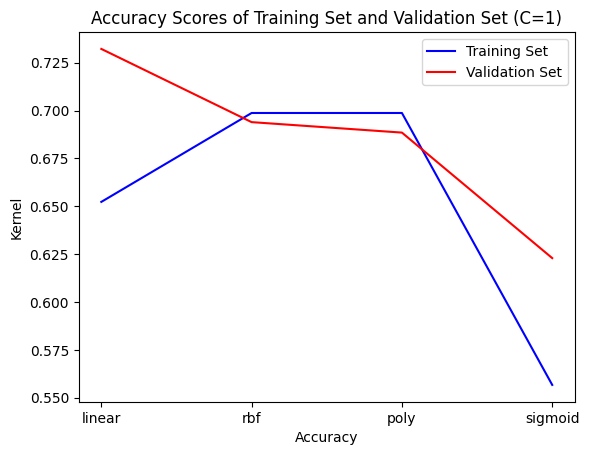

In [ ]:
#kernel optimisation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Accuracy scores
acc_training = []
acc_val =[]
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 acc_training.append(accuracy_score(y_train, y_pred))
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_vals_s)
 #print(k)
 acc_val.append(accuracy_score(y_val, y_pred))
y_data = ['linear', 'rbf', 'poly', 'sigmoid']
# Plot a simple line chart
plt.plot(y_data, acc_training, 'b', label = 'Training Set')
plt.plot(y_data, acc_val, 'r', label = 'Validation Set')
plt.xlabel('Accuracy')
plt.ylabel('Kernel')
plt.title('Accuracy Scores of Training Set and Validation Set (C=1)')
plt.legend()
plt.show()

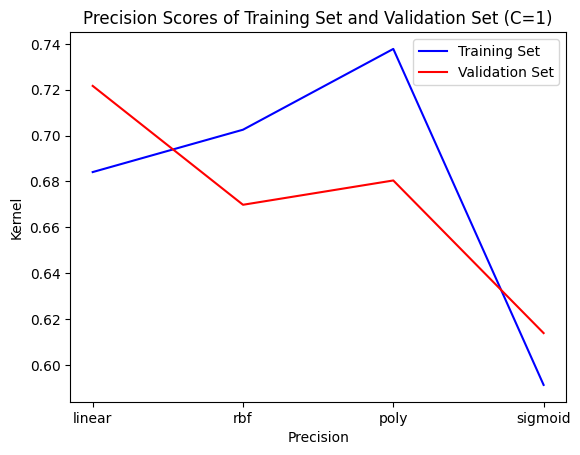

In [ ]:
# Plotting precision scores

pres_training = []
pres_val =[]
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 pres_training.append(precision_score(y_train, y_pred))
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_vals_s)
 #print(k)
 pres_val.append(precision_score(y_val, y_pred))
# Plot a simple line chart
plt.plot(y_data, pres_training, 'b', label = 'Training Set')
plt.plot(y_data, pres_val, 'r', label = 'Validation Set')
plt.xlabel('Precision')
plt.ylabel('Kernel')
plt.title('Precision Scores of Training Set and Validation Set (C=1)')
plt.legend()
plt.show()


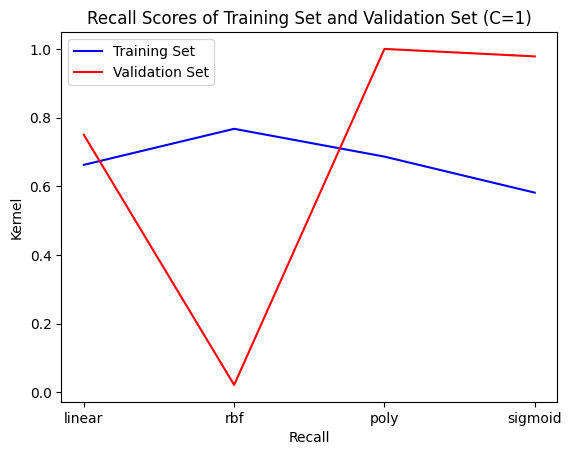

In [ ]:
# Plotting recall scores

rec_training = []
rec_val =[]
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 rec_training.append(recall_score(y_train, y_pred))
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_val)
 #print(k)
 rec_val.append(recall_score(y_val, y_pred))
y_data = ['linear', 'rbf', 'poly', 'sigmoid']
# Plot a simple line chart
plt.plot(y_data, rec_training, 'b', label = 'Training Set')
plt.plot(y_data, rec_val, 'r', label = 'Validation Set')
plt.xlabel('Recall')
plt.ylabel('Kernel')
plt.title('Recall Scores of Training Set and Validation Set (C=1)')
plt.legend()
plt.show()

TRAINING
[0.1, 0.15000000000000002, 0.20000000000000004, 0.25000000000000006, 0.30000000000000004, 0.3500000000000001, 0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003, 1.0000000000000004, 1.0500000000000003, 1.1000000000000005, 1.1500000000000004, 1.2000000000000004, 1.2500000000000004, 1.3000000000000005, 1.3500000000000005, 1.4000000000000006, 1.4500000000000006, 1.5000000000000004, 1.5500000000000005, 1.6000000000000005, 1.6500000000000006, 1.7000000000000006, 1.7500000000000007, 1.8000000000000007, 1.8500000000000008, 1.9000000000000008, 1.9500000000000006, 2.0000000000000004, 2.0500000000000007, 2.100000000000001, 2.150000000000001, 2.2000000000000006, 2.250000000000001, 2.3000000000000007, 2.350000000000001, 2.400000000000001, 2.450000000000001, 2.500000000000001, 2.5500000000000007, 2.6000

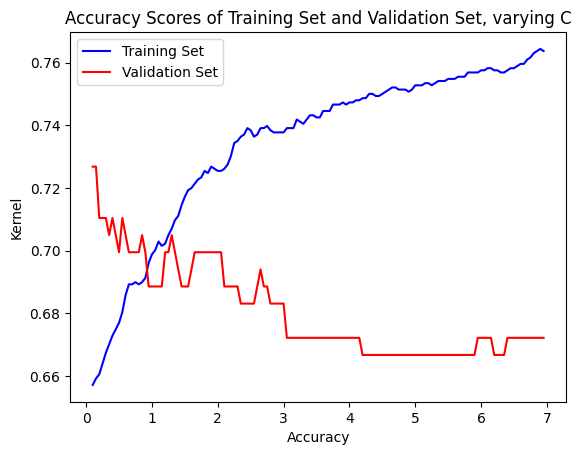

In [ ]:
####### varying C ######
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#ACCURACY

acc_training_c = []
acc_val_c =[]
y_data_c = []
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('TRAINING')
for c in np.arange(0.1,7,0.05):
 y_data_c.append(c)

print(y_data_c)
for c in np.arange(0.1,7,0.05):
 model = svm.SVC(C =c)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 acc_training_c.append(accuracy_score(y_train, y_pred))
for c in np.arange(0.1, 7, 0.05):
 model = svm.SVC(C=c)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_vals_s)
 #print(k)
 acc_val_c.append(accuracy_score(y_val, y_pred))

# Plot a simple line chart: accuracy
plt.plot(y_data_c, acc_training_c, 'b', label = 'Training Set')
plt.plot(y_data_c, acc_val_c, 'r', label = 'Validation Set')
plt.xlabel('Accuracy')
plt.ylabel('Kernel')
plt.title('Accuracy Scores of Training Set and Validation Set, varying C')
plt.legend()
plt.show()


In [ ]:
# Precision
pres_training_c = []
pres_val_c =[]
for c in np.arange(0.1, 7, 0.05):
 model = svm.SVC(C=c)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 pres_training_c.append(precision_score(y_train, y_pred))

for c in np.arange(0.1, 7, 0.05):
 model = svm.SVC(C=c)
 model.fit(X_train_s,y_train)
 y_pred = model.predict(X_vals_s)
 #print(k)
 pres_val_c.append(precision_score(y_val, y_pred))

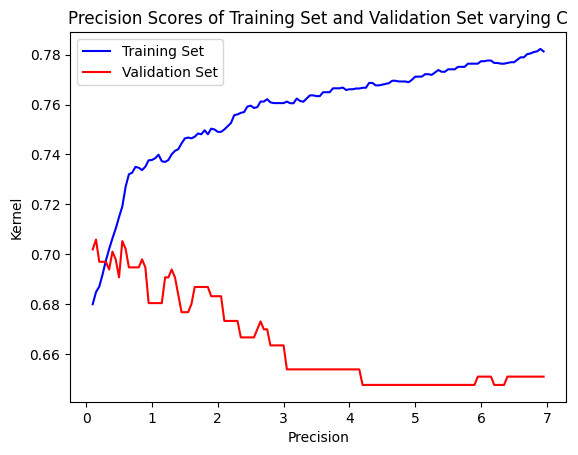

In [ ]:
# Plot a simple line chart: precision
plt.plot(y_data_c, pres_training_c, 'b', label = 'Training Set')
plt.plot(y_data_c, pres_val_c, 'r', label = 'Validation Set')
plt.xlabel('Precision')
plt.ylabel('Kernel')
plt.title('Precision Scores of Training Set and Validation Set varying C')
plt.legend()
plt.show()

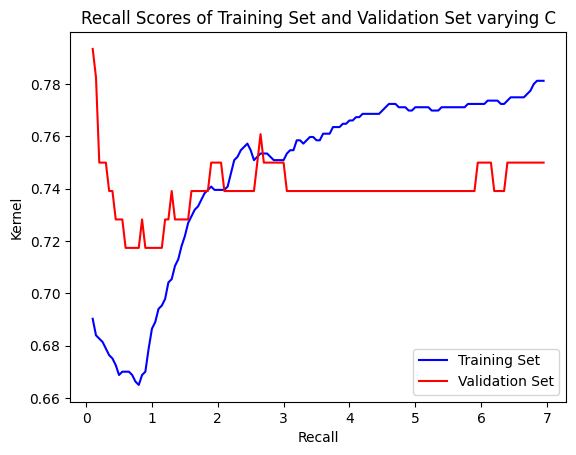

In [ ]:
#recall

rec_training_c = []
rec_val_c =[]
for c in np.arange(0.1, 7, 0.05):
 model = svm.SVC(C=c)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 rec_training_c.append(recall_score(y_train, y_pred))
for c in np.arange(0.1, 7, 0.05):
 model = svm.SVC(C=c)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_vals_s)
 #print(k)
 rec_val_c.append(recall_score(y_val, y_pred))

 # Plot a simple line chart: recall
plt.plot(y_data_c, rec_training_c, 'b', label = 'Training Set')
plt.plot(y_data_c, rec_val_c, 'r', label = 'Validation Set')
plt.xlabel('Recall')
plt.ylabel('Kernel')
plt.title('Recall Scores of Training Set and Validation Set varying C')
plt.legend()
plt.show()

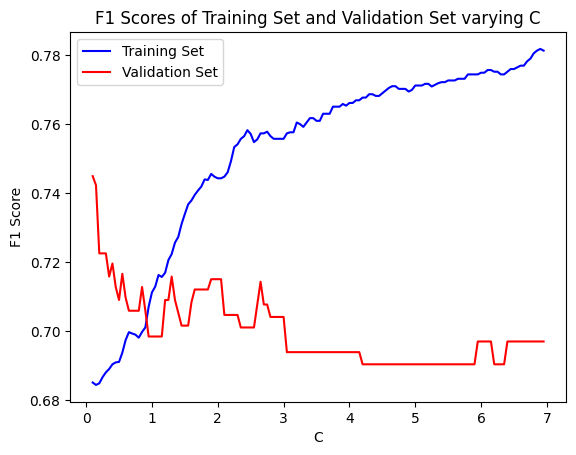

In [ ]:
f1_training_c = []
f1_val_c = []

C_values = np.arange(0.1, 7, 0.05)

for C in C_values:
    model = svm.SVC(C=C)
    model.fit(X_train_s, y_train)
    y_pred_train = model.predict(X_train_s)
    y_pred_val = model.predict(X_vals_s)

    f1_training_c.append(f1_score(y_train, y_pred_train))
    f1_val_c.append(f1_score(y_val, y_pred_val))

# Plot F1 scores
plt.plot(C_values, f1_training_c, 'b', label='Training Set')
plt.plot(C_values, f1_val_c, 'r', label='Validation Set')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Training Set and Validation Set varying C')
plt.legend()
plt.show()

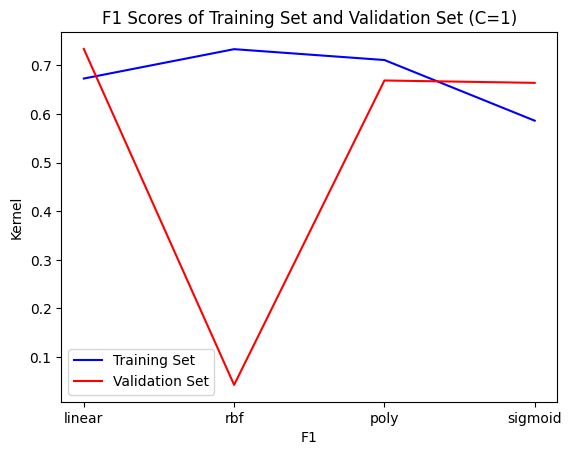

In [ ]:
f1_training = []
f1_val =[]
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_train_s)
 #print(k)
 f1_training.append(f1_score(y_train, y_pred))
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
 model = svm.SVC(kernel=k)
 model.fit(X_train_s, y_train)
 y_pred = model.predict(X_val)
 #print(k)
 f1_val.append(f1_score(y_val, y_pred))
y_data = ['linear', 'rbf', 'poly', 'sigmoid']
# Plot a simple line chart
plt.plot(y_data, f1_training, 'b', label = 'Training Set')
plt.plot(y_data, f1_val, 'r', label = 'Validation Set')
plt.xlabel('F1')
plt.ylabel('Kernel')
plt.title('F1 Scores of Training Set and Validation Set (C=1)')
plt.legend()
plt.show()

In [ ]:
# Accuracy, Precision and Recall for Test data

model = svm.SVC(C=0.2, kernel='poly', gamma = 'scale')
model.fit(X_train_s,y_train)
y_pred = model.predict(X_test_s)
print('test')
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

test
0.644808743169399
0.6504065040650406
0.7843137254901961
0.7111111111111111
